In [1]:
import pandas as pd
import numpy as np
from time import time
import datetime
#import quandl as quandl
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.contrib.keras.api.keras.models import Sequential
from tensorflow.contrib.keras.api.keras.layers import Dense, Dropout, Reshape,Dropout,Activation,Flatten
from tensorflow.contrib.keras.api.keras.layers import Embedding
from tensorflow.contrib.keras.api.keras.layers import LSTM
from tensorflow.contrib.keras.api.keras.layers import Conv2D,MaxPooling2D
from tensorflow.contrib.keras.api.keras.layers import Conv1D,MaxPooling1D
from tensorflow.contrib.keras.api.keras.optimizers import SGD

from tensorflow.keras.optimizers import Adam
#import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'tensorflow.contrib'

In [143]:
#-------------------------------------------------------------------------------------------------------------
# 1: 加载数据文件，查看数据信息
df = pd.read_csv('train.csv')
df.head() # broadband 即可：0-离开，1-留存
df_test = pd.read_csv('test.csv')

from tqdm import tqdm_notebook
from sklearn.preprocessing import LabelEncoder
# LabelEncoder
for col in tqdm_notebook(df.columns):
    if df[col].dtype == "object":
        encoder = LabelEncoder()
        encoder.fit(list(df[col].values) + list(df_test[col].values))
        df[col] = encoder.transform(list(df[col].values))
        df_test[col] = encoder.transform(list(df_test[col].values))
        
df = df.reset_index() # 重置索引
df_test = df_test.reset_index()
def clean_top_cols(df):
    new_cols = [col for col in df.columns if df[col].value_counts(dropna=False, normalize=True).values[0] > 0.80]
    return new_cols
df_cols = clean_top_cols(df)
df_test_clos = clean_top_cols(df_test)
cols_to_drop = list(set(df_cols + df_test_clos))
if 'bad_good' in cols_to_drop : # 查看标签列是否在其中
    cols_to_drop.remove('bad_good') # 删除标签列
#print("原始的train shape : ", df)
df = df.drop(cols_to_drop, axis=1)
df_test = df_test.drop(cols_to_drop, axis=1)
#print("清理后的train shape : ", df.shape)

y = df['bad_good'] # 标签
X1 = df.iloc[:, 1:-1] # 客户 id 没有用，故丢弃 cust_id

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-06,170.0,182.0,155.0,157.5,134.963135,4648431
1,2015-03-09,162.0,163.0,157.0,157.0,134.534668,885810
2,2015-03-10,158.5,159.5,155.0,155.0,132.820847,519293
3,2015-03-11,155.5,155.5,151.0,152.5,130.678574,491729
4,2015-03-12,151.0,153.0,149.0,152.0,130.250122,760386


In [144]:
x0 = df['Adj Close'].values
len(x0)

1554

In [145]:
m = max(x0)
x0=x0/m
x0[:10]
n = len(x0)
p =20
x = np.array([x0[k:k+p] for k in range(n-p)])
x.shape

(1534, 20)

In [146]:
y =np.array(x0[p:])
y.shape

(1534,)

In [147]:
X = x[:-1]
X = x[:, :, np.newaxis]
X.shape

(1534, 20, 1)

In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, y,test_size=0.2,shuffle=False)
X_train.shape

(1227, 20, 1)

In [149]:
model = Sequential()
model.add(Conv1D(50,4,padding='same',activation='relu',input_shape=(p,1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(20))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation("sigmoid"))
#from tensorflow.contrib.keras.api.keras.optimizers import Adam
model.compile(loss='mse', optimizer=SGD(lr=0.8), metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 20, 50)            250       
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 10, 50)            0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 500)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 20)                10020     
_________________________________________________________________
dropout_15 (Dropout)         (None, 20)                0         
_________________________________________________________________
activation_28 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)               

In [150]:
model.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
1227/1227 [==============================] - 0s 291us/sample - loss: 0.0115 - acc: 8.1500e-04
Epoch 2/50
1227/1227 [==============================] - 0s 120us/sample - loss: 0.0069 - acc: 8.1500e-04
Epoch 3/50
1227/1227 [==============================] - 0s 114us/sample - loss: 0.0051 - acc: 8.1500e-04
Epoch 4/50
1227/1227 [==============================] - 0s 126us/sample - loss: 0.0044 - acc: 8.1500e-04
Epoch 5/50
1227/1227 [==============================] - 0s 125us/sample - loss: 0.0042 - acc: 8.1500e-04
Epoch 6/50
1227/1227 [==============================] - 0s 186us/sample - loss: 0.0037 - acc: 8.1500e-04
Epoch 7/50
1227/1227 [==============================] - 0s 118us/sample - loss: 0.0033 - acc: 8.1500e-04
Epoch 8/50
1227/1227 [==============================] - 0s 107us/sample - loss: 0.0037 - acc: 8.1500e-04
Epoch 9/50
1227/1227 [==============================] - 0s 111us/sample - loss: 0.0036 - acc: 8.1500e-04
Epoch 10/50
1227/1227 [==============================] 

[[57.54308083 57.360399   56.62969176 ... 53.97736143 54.23317788
  53.55099996]
 [57.5772415  57.39445123 56.6633102  ... 54.0094053  54.26537362
  53.58279071]
 [57.65865917 57.47561042 56.74343551 ... 54.08577783 54.34210811
  53.65855999]
 ...
 [63.77252229 63.57006388 62.76025246 ... 59.8207888  60.10429918
  59.34827071]
 [64.63234714 64.42715905 63.6064292  ... 60.62733367 60.91466653
  60.14844477]
 [65.50824073 65.30027195 64.46841962 ... 61.44895157 61.74017834
  60.96357279]]


array([0.95503736], dtype=float32)

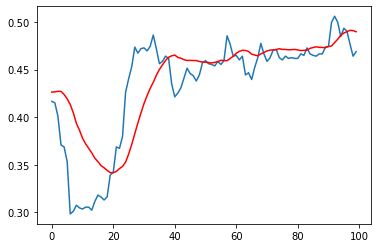

In [151]:
y_predict = model.predict(X_test)
print(y_predict*(df['Adj Close'].values))
plt.plot(Y_test[:100])
plt.plot(y_predict[:100],'r')
#ACC
error = 0
summary = 0
for i in range(307) :
    error += abs(y_predict[i] - Y_test[i])
    summary += Y_test[i]
acc = 1 - error/summary
acc